In [30]:
import numpy as np
import matplotlib.pyplot as plt

lattice size = L * L

but the size of the lattice must be (L+2) * (L+2)

and the index    

j -> 1:L+1

i -> 1:L+1



array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

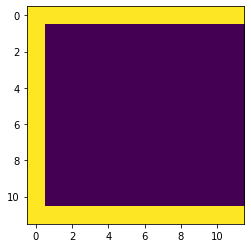

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.],
       [1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.],
       [1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.],
       [1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

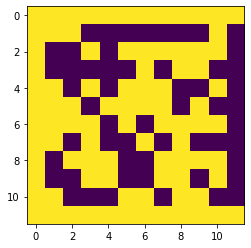

array([[ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

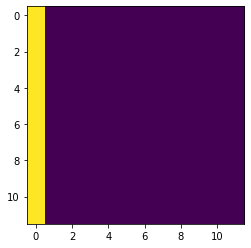

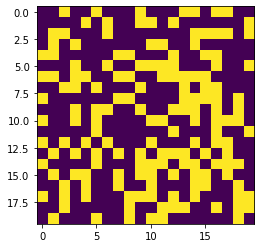

In [757]:
L = 20
lattice = np.zeros((L+2,L+2))

lattice[:,0]=1
lattice[0,:]=-2
lattice[-1]=-2
plt.imshow(lattice)
lattice

p=0.4
for j in range(1,L+1):
  for i in range(1,L+1):
    rand = np.random.random()
    if rand<p :
        lattice[i,j]=1
        
        
plt.imshow(lattice[1:L+1,1:L+1])
lattice


upper_range=1000
cluster = [0 for i in range(upper_range)]
color = [i for i in range(0,upper_range)]
size = [0 for i in range(upper_range)]
cluster[0]=color[0]

color_matrix = -np.ones((L+2,L+2),dtype='int')
color_matrix[:,0]=color[0]


#plt.imshow(color_matrix)
color_matrix


color_counter=0
for i in range(1,L+1):
    for j in range(1,L+1):
        
        if lattice[i,j]==1:
             
            if lattice[i-1,j]==lattice[i,j-1]==1:
                if color_matrix[i-1,j]==color_matrix[i,j-1]:
                    color_matrix[i,j]=color_matrix[i,j-1]
                    size[color_matrix[i,j]]+=1
                else:
                    color_matrix[i,j]=color_matrix[i,j-1] 
                    size[color_matrix[i,j]]+=1
                    cluster[color_matrix[i-1,j]]=color_matrix[i,j]
                
            elif lattice[i-1,j]==1:
                color_matrix[i,j]=color_matrix[i-1,j]
                size[color_matrix[i,j]]+=1
                
            elif lattice[i,j-1]==1:
                color_matrix[i,j]=color_matrix[i,j-1]
                size[color_matrix[i,j]]+=1
                
            else:
                color_counter+=1
                color_matrix[i,j]=color[color_counter]
                cluster[color_matrix[i,j]]=color_matrix[i,j]
                size[color_matrix[i,j]]+=1
       
                
#lattice                


array([[ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1,  1, -1, -1,  2, -1, -1, -1,  3, -1, -1, -1,  4,  4,
        -1,  5,  5, -1, -1, -1],
       [ 0, -1, -1, -1, -1,  6, -1,  7, -1, -1,  3,  3, -1,  8, -1, -1,
        -1, -1, -1, -1,  9, -1],
       [ 0, -1, 10, 10, -1, -1, -1,  7, -1, -1, -1, -1, -1, -1, -1, 11,
        11, 11, 11, -1,  9, -1],
       [ 0, -1, 10, -1, 12, -1, -1, -1, -1, -1, -1, 13, 13, -1, -1, 11,
        -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0, -1, -1, -1, -1, -1, 14, 14, -1, -1, -1, 15, -1, -1,
        16, 16, -1, -1, -1, -1],
       [ 0, -1, -1, -1, 17, -1, -1, 18, -1, -1, 19, 19, 19, 19, -1, -1,
        -1, 16, -1, -1, 20, -1],
       [ 0,  0,  0, -1, 17, 17, -1, -1, 21, 21, -1, -1, 19, 19, 19, 19,
        19, -1, -1, -1, -1, -1],
       [ 0, -1, -1, 22, 22, -1, 23, -1, -1, -1, 24, -1, -1, -1, 19, -1,
        19, 19, -1, -1, -1, -1],
       [ 0,  0, -1, -1, -1, -1, -1, -1, 25, 25, -1, -1,

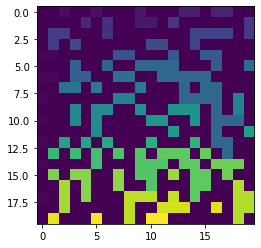

In [758]:
plt.imshow(color_matrix[1:L+1,1:L+1])
color_matrix

In [759]:
def color_of_cluster(cluster_number, cluster):
    if cluster[cluster_number] == cluster_number:
        #print('here is the answer:{}'.format(cluster_number))
        return cluster_number
    else:
        #print(cluster[cluster_number])
        a = color_of_cluster(cluster[cluster_number],cluster)
        return a
    

In [760]:
pre_color_matrix=np.zeros(color_matrix.shape)
while not (pre_color_matrix == color_matrix).all():
    pre_color_matrix= 1*color_matrix
    for i in range(L+1,-1,-1):
        for j in range(L+1,-1,-1):
            if color_matrix[i,j]!=-1:
                color_matrix[i,j]=color_of_cluster(cluster[color_matrix[i,j]],cluster)
          




array([[ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1],
       [ 0, -1, -1,  1, -1, -1,  2, -1, -1, -1,  3, -1, -1, -1,  4,  4,
        -1,  5,  5, -1, -1, -1],
       [ 0, -1, -1, -1, -1,  6, -1,  7, -1, -1,  3,  3, -1,  8, -1, -1,
        -1, -1, -1, -1,  9, -1],
       [ 0, -1,  0,  0, -1, -1, -1,  7, -1, -1, -1, -1, -1, -1, -1, 11,
        11, 11, 11, -1,  9, -1],
       [ 0, -1,  0, -1, 12, -1, -1, -1, -1, -1, -1, 13, 13, -1, -1, 11,
        -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0, -1, -1, -1, -1, -1, 14, 14, -1, -1, -1, 46, -1, -1,
        16, 16, -1, -1, -1, -1],
       [ 0, -1, -1, -1, 22, -1, -1, 18, -1, -1, 46, 46, 46, 46, -1, -1,
        -1, 16, -1, -1, 20, -1],
       [ 0,  0,  0, -1, 22, 22, -1, -1, 21, 21, -1, -1, 46, 46, 46, 46,
        46, -1, -1, -1, -1, -1],
       [ 0, -1, -1, 22, 22, -1, 23, -1, -1, -1, 24, -1, -1, -1, 46, -1,
        46, 46, -1, -1, -1, -1],
       [ 0,  0, -1, -1, -1, -1, -1, -1, 25, 25, -1, -1,

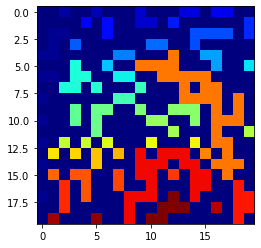

In [761]:
plt.imshow(color_matrix[1:L+1,1:L+1], cmap=plt.get_cmap('jet'))
#plt.imshow(color_matrix[1:L+1,1:L+1])
color_matrix

# Numeric analysis
perivous sections was somehow for visualization.
but for our simulatoin we want something more than a few colorful plots.

to make a numeric analysis we need to make the code more clear and systematic